In [1]:
%load_ext autoreload  
%autoreload 2


In [2]:
import math                     as math
import matplotlib.pyplot        as plt
import numpy as np
# import necessary plons scripts
import plons.AccrDisk           as ad

/tmp/ipykernel_20791/3481591778.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


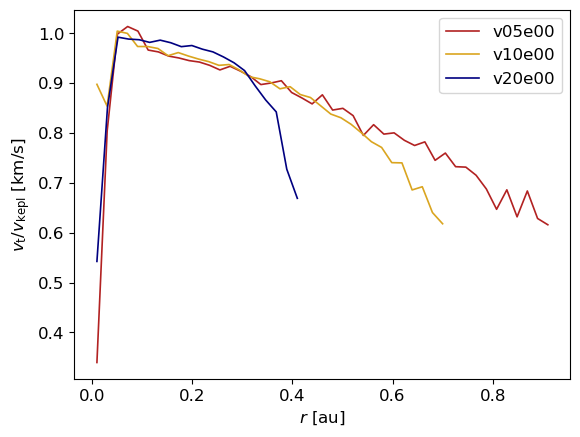

In [47]:
%matplotlib inline 

dump = 584
models = ['v05e00','v10e00','v20e00']
rs  = [0.91, 0.7, 0.41]   #for crit03
colors = ['firebrick','goldenrod','navy']

#rvalue to start from + also determines step for rr array
rstep = 0.02
rmin  = rstep/2
# rmin = 0.005
fig, ax = plt.subplots()

i = 0
for model in models:
    run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)+'/'
    dumpData,setup = ad.loadDataForSmoothing(run,dump)
    rmax = rs[i]
    ad.plot_vt_divided_vtKepl(ax,rmax,rmin,rstep,dumpData,model,colors,i)
    i = i+1
ax.legend(fontsize = 12)
ax.set_xlabel(r'$r$ [au]',fontsize = 12)
ax.set_ylabel(r'$v_{\rm t}/v_{\rm kepl}$ [km/s]',fontsize = 12,rotation = 90)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
fig.show()
plt.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/vt:vtKepl.png')
# plt.close()

/tmp/ipykernel_20791/3909979772.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


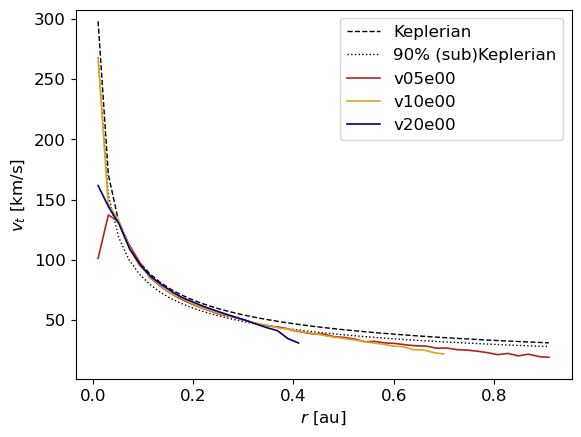

In [48]:
%matplotlib inline 

dump = 584
fig, ax = plt.subplots()
rstep = 0.02
rmin  = rstep/2
models = ['v05e00','v10e00','v20e00']
colors = ['firebrick','goldenrod','navy']
lineStyles=['-','-','-','-']
# rs  = [0.94, 0.75, 0.36]   #for crit03
rs  = [0.91, 0.7, 0.41]   #for crit03

k_vt   = np.array([])
r_vt_max = np.array([])
i = 0
for model in models:
    run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)+'/'
    dumpData,setup = ad.loadDataForSmoothing(run,dump)
    rmax = rs[i]#-rstep/2
    r_vt_max = ad.plot_vt_vKepl(ax,rmax,rmin,rstep,dumpData,model,k_vt,r_vt_max,colors,lineStyles,i)
    i = i+1
ax.legend(fontsize = 12)
ax.set_xlabel(r'$r$ [au]',fontsize = 12)
ax.set_ylabel(r'$v_t$ [km/s]',fontsize = 12,rotation = 90)
ax.set_ylim(1,np.max(r_vt_max)+40)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
fig.show()
plt.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/vt_vtKepl.png')
# plt.close()

In [49]:
# import plons.ConversionFactors_cgs        as cgs

# def plot_vrmean(ax,rmax,rmin,rstep,dumpData,model,colors,i):
#     # set number of rvalues for which we will plot velocities
#     rnum = int(rmax /rstep)
#     # make rr array
#     rr = np.linspace(rmin,rmax,rnum)
#     r_vr = np.array([])
#     for r in rr:
#         # filter = (dumpData['new_r']/cgs.au<(r+(rmin/2))) & (dumpData['new_r']/cgs.au>(r-(rmin/2)))
#         filter = (dumpData['new_r']/cgs.au<(r+(rmin))) & (dumpData['new_r']/cgs.au>(r-(rmin)))
#         r_vr = np.append(r_vr, np.mean(dumpData['new_vr'] [filter]))
#     ax.plot(rr,r_vr,c=colors[i],linestyle = '-',linewidth = 1.2,label = str(model))

/tmp/ipykernel_24138/941996172.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig1.show()
/tmp/ipykernel_24138/941996172.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


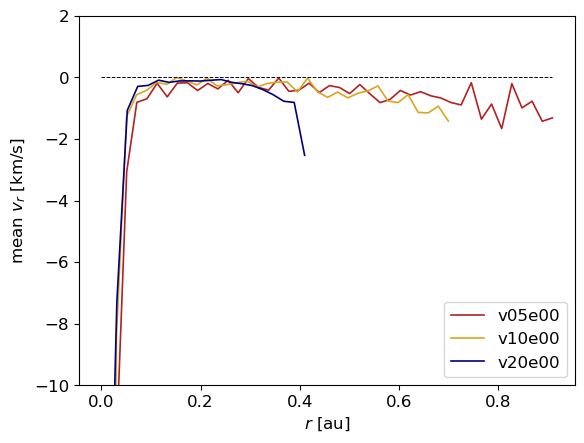

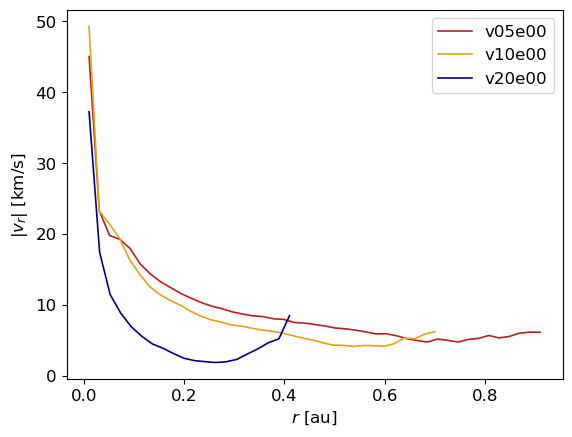

In [6]:
%matplotlib inline 

dump = 584
fig1, ax1 = plt.subplots()
fig2, ax2 = plt.subplots()
rstep = 0.02
# rstep = 0.01
rmin  = rstep/2
models = ['v05e00','v10e00','v20e00']
colors = ['firebrick','goldenrod','navy']
# rs  = [0.94, 0.75, 0.36]  
rs  = [0.91, 0.7, 0.41]   #for crit03

i = 0
for model in models:
    run    = '/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/'+str(model)+'/'
    dumpData,setup = ad.loadDataForSmoothing(run,dump)
    rmax = rs[i]#-rstep/2
    ad.plot_vrmean(ax1,ax2,rmax,rmin,rstep,dumpData,model,colors,i)
    i = i+1

ax1.hlines(0,0,np.max(rs),linewidth = 0.7,linestyle = '--',color = 'k') 
ax1.legend(fontsize = 12)
ax1.set_xlabel(r'$r$ [au]',fontsize = 12)
ax1.set_ylabel(r'mean $v_r$ [km/s]',fontsize = 12,rotation = 90)
ax1.set_ylim(-10,2)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
fig1.show()
fig1.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/mean_vr.png')

ax2.legend(fontsize = 12)
ax2.set_xlabel(r'$r$ [au]',fontsize = 12)
ax2.set_ylabel(r'$|v_r|$ [km/s]',fontsize = 12,rotation = 90)
# ax1.set_ylim(-10,2)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
fig2.show()
fig2.savefig('/lhome/jolienm/Documents/TierModels/finalModelsAccrDisks/plotsAnalysis/mean_abs_vr.png')





# plt.close()